## Advanced `numpy`: Understanding and creating data

### Learning goals:
 
 - Understand the basic distribution of individual variables
 - [Data scraping](https://en.wikipedia.org/wiki/Web_scraping).
 - How to organize data (or [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling))
 - Use existing data to predict future data (data simulation)
 - Generate correlated datasets from existing data parameters.
 - Advanced understanding of indexing into `numpy` `arrays`
 - Practice with loops and advanced plots using `matplotlib`

In previous tutorials, we have mostly focussed on operations using small `lists` or `arrays`, with only a few dozens of observations. In general, when handling data in the real world, arrays and lists are larger (hundreds to thousands of observations).

In this tutorial we will learn how to think about data and how to use `numpy` to create data that respects some properties of an underlying data set.

---

First thing first, we will import the basic libraries we need. 

*Note that we will import also `pandas` even though we have not really learned much abotu this library yet. This is because we will used some of its functionality to copy data from online.*

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Simulating the height of USA presidents

Imagine being asked to guess the height of the next president of the USA. How would you go about it if you were a data scientists? Can we use existing data to make an educated guess?

Wikipedia offers a table with the records of the height of all presidents. You can find the [table here](https://en.wikipedia.org/wiki/Heights_of_presidents_and_presidential_candidates_of_the_United_States). 

The tallest president elected to office (Wikepedia reports) was Abraham Lincoln with a height of `6 ft 3+3⁄4 in` (or `192.4 cm`). The shortest president elected to office was James Madison with a height of `5 ft 4 in` or `163 cm`).

Our goal is to try to generate a sensible (believable) height of future presidets. How can we do that? How can we predict the height of future presidents? 

One approach could be to use the past to predict the future. So, to do that, we could use the height of the previous presidents as an educated guess for the height of the future presidents (this is not perfect ebcause there might be changes over time to the average height of human populations, see [this article for example](https://en.wikipedia.org/wiki/Human_height)). 

Although not perfect, we can use the distribution of height of the past presidents to make a prediction of the future president's height. Let' take a dive on how we can do this.

### Web scraping 

First of all, we will want to capture some data from the web, this is called [Web scraping](https://en.wikipedia.org/wiki/Web_scraping).

Our web scraping will be limited, we will want to copy the data from the [table in this Wikipedia article](https://en.wikipedia.org/wiki/Heights_of_presidents_and_presidential_candidates_of_the_United_States). 

To do so, we can use `pandas` `read_clipboard` to read the entire table of data into a pandas dataframe. 

Please select and copy to clipboard the table found on [this wikipedia article](https://en.wikipedia.org/wiki/Heights_of_presidents_and_presidential_candidates_of_the_United_States) You might remember that we have used `read_clipboard()` in a previous tutorial:

In [43]:
presidents_heights = pd.read_clipboard()


OK, if no errors were displayed, somehting should have happened(if errors were displayed, please make sure to have selected the table and only the table from the Wikipedia article). 

Next, let's take a look at the top and bottom 5 rows of the `pandas` `data frame` the copy operation should have created. We can use the methods `.head()` and `.tail()` respectively:

In [44]:
presidents_heights.head()

,Rank,No.,President,Height (in),Height (cm),Ref.
0,1,16,Abraham Lincoln,6 ft 4 in,193 cm,[3]
1,2,36,Lyndon B. Johnson,6 ft 3+1⁄2 in,192 cm,[4][5][6][note 1]
2,3,45,Donald Trump,6 ft 3 in,191 cm,[8][9][10][note 2]
3,4,3,Thomas Jefferson,6 ft 2+1⁄2 in,189 cm,[13][14]
4,4,42,Bill Clinton,6 ft 2+1⁄2 in,189 cm,[15]


In [45]:
presidents_heights.tail() # bottom 5 rows

,Rank,No.,President,Height (in),Height (cm),Ref.
40,41,2,John Adams,5 ft 7 in,170 cm,[13][40]
41,41,25,William McKinley,5 ft 7 in,170 cm,[13]
42,43,8,Martin Van Buren,5 ft 6 in,168 cm,[41]
43,43,23,Benjamin Harrison,5 ft 6 in,168 cm,[42]
44,45,4,James Madison,5 ft 4 in,163 cm,[13][43]


Our main goal is to study and use the distribution of heights of the past presidents, and se that distribution as a model for the future presidents.

For example, the most basic thing we can do is to use the mean of the previosu rpesidents as a predictor of the likely height of the enxt president. That seems sensible, doesn't it?

Before we do that we would like to plot the data, to plot the distribution of heights, and that plot would be something like histogram plot. `pyplot` has a method called [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), we can use that, but as it turns out the data we will need to be prepared before we can use that. So let's do that first, get the data we need, and only the data we need out of the full table. 

This is techincally called, [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling).

### Data wrangling

We have gotten some data, but it is not in the format we need it. We need to find a way to change the data so that it can be suable. A few things we will want to do to the data before it can be used for numerical operations:

  - Extract the data from the full table
  - Make sure the data extracted is in a usable format for numerical operations (say an `int` or a `float`)

We will work with the metric system so we will want to extract the height from the columncontaining the height in cm, this columne can be addressed in `pandas` as `Height (cm)`:

In [46]:
height_cm = presidents_heights["Height (cm)"]

And we can check that the operation worked out well, for example by looking at the first few elements of the new dataframe:

In [47]:
height_cm.head()

0    193 cm
1    192 cm
2    191 cm
3    189 cm
4    189 cm
Name: Height (cm), dtype: object

Great, now that we have extracted the data we want, the next thing we will want to do, so as to be able to handle the data and be confident about it, is to dump the `pandas dataframe` column we just extracted. 

We can do this by using the handy `pandas` method `to_numpy()`:

In [48]:
presidents_height_str = height_cm.to_numpy()

Exfellent, `pandas` seems quite powerful doesn't  it?

Yet, we are still not ready to do what we want; compute the mean and the standard deviation of the distribution of heights of the presidents of the united states. 

This is because the data given to us are strings (`str`) and have a trailing series of character that are not numeric and disadvantageous for numerical operations: ` cm`.

Take a look at the array:

In [56]:
presidents_height_str

array(['193 cm', '192 cm', '191 cm', '189 cm', '189 cm', '188 cm',
       '188 cm', '188 cm', '188 cm', '187 cm', '185 cm', '185 cm',
       '185 cm', '183 cm', '183 cm', '183 cm', '183 cm', '183 cm',
       '183 cm', '182 cm', '182 cm', '182 cm', '182 cm', '182 cm',
       '180 cm', '180 cm', '179 cm', '178 cm', '178 cm', '178 cm',
       '178 cm', '177 cm', '175 cm', '175 cm', '174 cm', '173 cm',
       '173 cm', '173 cm', '173 cm', '171 cm', '170 cm', '170 cm',
       '168 cm', '168 cm', '163 cm'], dtype=object)

 We need to find a way to remove the units (` cm` the trailing characters) and after that change the format of that data to a numeric one, for example to `int` (`float` would also work for numerical operations). 
 
As it turns out, we can remove the trailing characters using `numpy`'s [`rstrip(a[, chars])`](https://numpy.org/doc/stable/reference/generated/numpy.char.rstrip.html#numpy.char.rstrip).
 
 This will be a slightly complicate series of operations that, yet, will use all operations we have used before. Let's dig into it:

First, let's compute the number of presidents (the `len` of the `numpy` array), this number will be helpful to initialize arrays and use `for` loops: 

In [57]:
numPresidents = len(presidents_height_str)

Next, let's create an `numpy array` filled with `0`'s, to use to store the new numerical values of the height of the presidents. We will make the array filled with `int` and we will want a 1-D array of `len` equal the number of presidents:

In [60]:
presidents_height_int = np.zeros((numPresidents,), dtype=int)

The next things we need to do are the most challanging ones. We will need to remove the trailing characters and change the data type to `int`. We will do this using a `for` loop. 

Even though the next oeprations are a bit complicated, we will be using only operations that we have encountered before, and a single neat new method that `numpy` offers: `char.strip`. The method will allow us to strips away the last characters from the list. 

So let's do this:

In [61]:
for i in range(0,numPresidents) : # we loop over from 0 to the number of presidents
    temp = np.char.strip(presidents_height_str[i], ' cm') # we strip away *space+cm*
    presidents_height_int[i] = int(temp) # we change the format from char to it

Excellent, if all worked out well above, we can test now the type of the output variable, it should be `int`.

$\color{blue}{\text{Complete the following exercise.}}$

  - Check that the type of the output array from the above operations is an `int` as expected. Use the followign cell to return the result.
  
*Note that I am nto explicitly telling you the name of the variable I would like you to test, because I am itnerested in checking that you understand which one is the output variable and the end result of all the operations above (sneaky prof).*

In [62]:
print(presidents_height_int)

[193 192 191 189 189 188 188 188 188 187 185 185 185 183 183 183 183 183
 183 182 182 182 182 182 180 180 179 178 178 178 178 177 175 175 174 173
 173 173 173 171 170 170 168 168 163]



  - Repeat the same operations above, using the `for` loop, but change the data type from `int` to `float`. Call the output variable `presidents_height_float`
  
Use the cell below to show your work

In [74]:
presidents_height_float = []
for element in presidents_height_int:
    presidents_height_float.append(float(element))
    
print(presidents_height_float)


[193.0, 192.0, 191.0, 189.0, 189.0, 188.0, 188.0, 188.0, 188.0, 187.0, 185.0, 185.0, 185.0, 183.0, 183.0, 183.0, 183.0, 183.0, 183.0, 182.0, 182.0, 182.0, 182.0, 182.0, 180.0, 180.0, 179.0, 178.0, 178.0, 178.0, 178.0, 177.0, 175.0, 175.0, 174.0, 173.0, 173.0, 173.0, 173.0, 171.0, 170.0, 170.0, 168.0, 168.0, 163.0]


### Estimating key parameters from existing data

Once the data has been mapped to an appropriate format for numerical operations (`int` in our case), we can start exploring the data and estimating key parameters that we can use for our task.

To explore the data we can use a plot. A histogram of the data would give us a nice idea of the distribution of the data. We have imported `pyplot` which offers `hist()`, let's use that:

(array([ 1.,  2.,  3.,  5.,  3.,  7., 11.,  3.,  7.,  3.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <BarContainer object of 10 artists>)

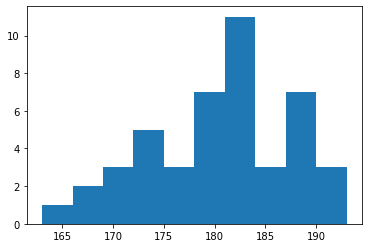

In [75]:
plt.hist(presidents_height_int)

$\color{blue}{\text{Complete the following exercise.}}$

  - Edit the plot about adding a title, and labels for the y and x-axis
  
  Use the cell below to plot the the histogram again with the requested edits.

Text(0.5, 0, 'Height in CM')

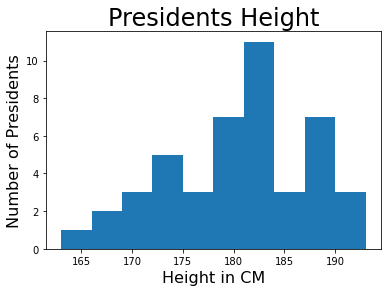

In [87]:
plt.hist(presidents_height_int)
plt.title('Presidents Height', fontsize = 24)
plt.ylabel('Number of Presidents', fontsize = 16)
plt.xlabel('Height in CM', fontsize = 16)

The distribution seems well-behaved, normal, or better normally distributed. When the histogram of a dataset is close enough to a normal distribution we can use the mean and standard deviation of the data to estimate the central tendency of the data and the spread around that central tendency.

Let's do that next, let' estimate the mean height of the past presidents and the variability around that mean:

In [88]:
height_mu = np.mean(presidents_height_int)
height_sd = np.std(presidents_height_int)

print('The mean height of the presidents of the USA as of today is', height_mu, 'cm')
print('The average variability around that mean has a standard deviation of', height_sd, 'cm')

The mean height of the presidents of the USA as of today is 180.22222222222223 cm
The average variability around that mean has a standard deviation of 7.013919141848946 cm


$\color{blue}{\text{Complete the following exercise.}}$

  - Are the mean and STD of the height of the presidents `int`, NO THEY ARE FLOATS? 
  - Show code below demonstrating how to test the type
  
  Use the cell below to show your code.

In [94]:
height_mu == int

False

  If the type is not `int` explaing why that is the case using the cell below:

This is being caused due to the fact that the mean is a mix of many integers, this would result in a float as the odds of the mean being a whole number are very small. The same can be said about the standard deviation, due to all the variation in the numbers, these results are bound to have decimals.

### Predicting the height of future presidents 

Now that we have the standard mean and standard deviation of the height fo past presidents, we are in position to make a prediction of the height of future presidents.

Under the assumption that no change int he height of males in the USA happens over a couple of hundreds of years (this is likely an unfair assumption, but fine enough for our experiment), we can estimate the mean height of the future president by generating random data centered at the height of the ast presidents with the same variability of the distribution of the meausred height.

This really just means that the most likely president in the future is very likely to have a height of 180 cm. But that some variability can happen around that value.

We can make a nmerical guess. We can guess that then ext president will have a height of 1800, plus some random factor that will make that height variate from the mean as controlled by the standard deviation.

In other words we can say that the future president comes from the same distribution of previous presidents plus some randomness.

The above can be implemented inpython using `random` anf `rand()`, the random generator that generates normally distributed data:

In [101]:
future_president_height = height_mu + height_sd*np.random.randn()

print('Our educated guess for the height of the next president given the height of the past presidents is:', future_president_height)

Our educated guess for the height of the next president given the height of the past presidents is: 181.24998989176825


Every time we execute the previosu cell we get a different prediction. The average prediction should be 180 cm, because that is the mean and we are setting that mean to be 180 by adding `height_mu` to the numbers generated by `np.random.randn`. Also, we are using the variabilty int he past data `height_sd` to make the data generate variate as if the new height were to be coming from a distribution with the same spread fo the past distribution. We are setting the spread of the distirbution by multiplying the numbers outputted by  `np.random.randn` by the `height_sd`.

In other words, adding a number to the random numer will shift the center (the value of the randome number) and set the mean value. By multiplying the random value we will change the spread or variability of the random value.

Well, we can continue talking about this or we can use code to test what we are say.

What we had done before is to create a single number, we used that number as *educated* guess of the height of the next president, given the height of the past presidents. But we can repeate the experiemnt multiple times and look at the resutl:=.

For example, we can simulate 10 presidents instead of only one:

In [108]:
future_president_height = height_mu + height_sd*np.random.randn(5,)
print(future_president_height)

[179.28429281 186.72153416 180.96118608 174.06214619 182.91008198]


Great, it worked. We can see above that there is quite some variability in the estimates, but the average shoudl be close to 180 cm. Let's measure that:

In [109]:
print(np.mean(future_president_height))

180.78784824384962


Pretty close, and what about the standard deviation? It should be close to what we set it to about 7 cm:

In [110]:
print(np.std(future_president_height))

4.177039567221943


Not we can repeate the experiments above and appreciate what happens when we try not with 1, not with 5, but with 100 or 1000 guesses:

In [111]:
pres_height_100 = height_mu + height_sd*np.random.randn(100,)
print('The mean is',np.mean(pres_height_100))
print('The STD is',np.std(pres_height_100))

The mean is 180.26628011615554
The STD is 7.633405588596725


The estimates now are much closer to the numbers we expected; 180 and 7 cm. What about if we try with 1000 guesses or even better 10,000?

In [112]:
pres_height_10000 = height_mu + height_sd*np.random.randn(10000,)
print('The mean is',np.mean(pres_height_10000))
print('The STD is',np.std(pres_height_10000))

The mean is 180.28695062656732
The STD is 6.965548976379526


Both the mean and the standard deviation are much closer to what we set them to be 180 and 7 cm. This is because we are computing multiple guesses for the height of the future president and we are then averaging over many guesses, given that the guesses are set to have mean of 180 and a standard deviation fo 7 cm, if we use enough guesses we are doomed to get back what we set the parameters to be.

We can make a nice plot of the distrobution and the distribution should look pretty normal.

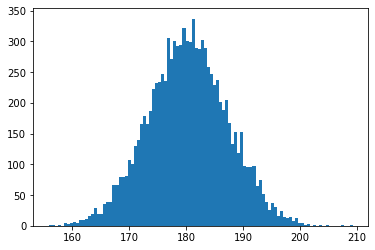

In [113]:
a = plt.hist(pres_height_10000, 100)

The above is a simple example of how we can use data, to generate a data-driven guess, and in doing so, we are effectively encountering a first case of data simulation.

We simulated the height of the future president of the USA, given the past data that we collected from online. Pretty cool, data sciency stuff.

Note, that the use of `random` and `rand()` is not just cool, is also pretty deep. At this point we are not going to dig too much into the how and the why that operation works. But we might do more of this in the future and hoefully you have encoutnered similar operations in the past, because you will most likely encounter them in the future if you continue working in data science.

$\color{blue}{\text{Complete the following exercise.}}$

  - Simulate the data of the wives of the 200 future USA presidents given that the mean height of the wives in the past has been 163 cm with a standard deviation of 6 cm

Use the cell below to show the code. Also plot the historgram of your data and add a title, and labels to the plot.

Text(0.5, 0, 'Height in CM')

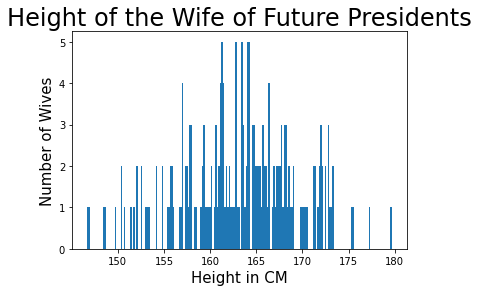

In [120]:
wife_height_mu = 163
wife_height_sd = 6
wife_height_100 = wife_height_mu + wife_height_sd*np.random.randn(200,)
b = plt.hist(wife_height_100, 200)
plt.title('Height of the Wife of Future Presidents', fontsize = 24)
plt.ylabel('Number of Wives', fontsize = 15)
plt.xlabel('Height in CM', fontsize = 15)

### Generating correlated datasets

After learning how to create a single datasets based on some simple assumptions on the distribution underlying our process we will next learn how to create two correlated datasets. Think about these datasets as the height of the presidents and their wives. 

We will run under the assumption I know, I am sorry...) that there is some weird tendency of people with correlated height to marry, if you are tall, you are more likely to marry a tall person, and if you are short you are more likely to marry a shorter person (no statement here, just trying to do some data science).

More specifically, we will create a dataset called `x` (the presidents). Each dataset will have the length of `m` (where for example, `m` could be 100 or 1000), this means that, for example, each dataset will have the shape of (m,1) or in our example (1000,1).

After that, we will create another dataset called `y` (the wives) of the same shape of `x` (one wife per president). Each one of the `y` dataset data points will have a corresponding `x` datapoint, that it will be correlated with.

Let's get started with a hands on method. First we will make the example of a single dataset `x` and a correlated dataset `y`.

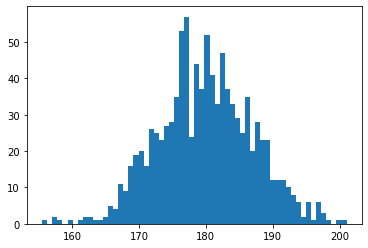

In [121]:
# The USA Presidents

# We first build the dataset `x` 
# we will use our standard method
# based on randn
m  = 1000
mu = 180
sd = 7
x  = mu + sd*np.random.randn(m,1)

# let take a look at it
a = plt.hist(x, 60)

OK. After generating the first dataset we will generate a second dataset, let's call it `y`. This second dataset will be correlated to the first.

To generate a dataset correlated to `x` we will indeed use `x` as our base for the data and add on top of `x` a small amount of noise, let's call it `noise`. `noise` represents the small (or larger) difference between `x` and `y`. 

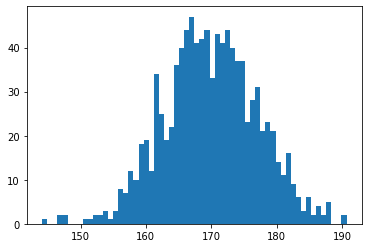

In [122]:
# The First ladies, USA Presidents

err = np.random.randn(m,1)
y = (x + err) - 10 # Let's assume the wives are 10 cm shorter than the presidents
a = plt.hist(y,60)

OK. The two histograms seem similar (similar range and height), but it is difficult to judge if `x` and `y` are indeed correlated. To do that we need to make a scatter plot.

`matplotlib` has a convenient function for scatter plots, `plt.scatter()`, we will use that function to take a look at whether the two datasets are correlated.

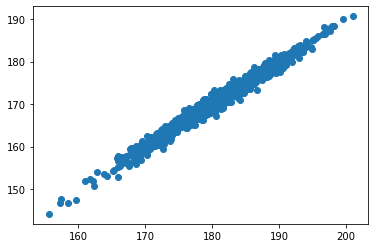

In [123]:
plt.scatter(x,y)

Great, the symbols should be aligned along the major diagonal. This means that they are indeed correlated. To get to understand more what we did above, let's think about `err`.

Imagine, if there were no error, e.g., no `err`. That would mean that there would be no difference between `x` and `y`. Literally, the two datasets would be identical.

We can do that with the code above by setting `err` to `0`.

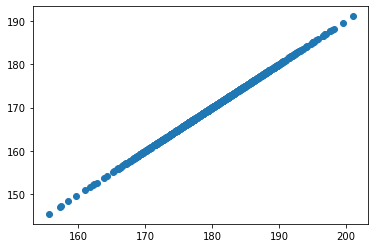

In [124]:
err = 0
y = x + err - 10
plt.scatter(x,y)

The symbols should all lay on the major diagonal. So, `err` effectively controls the level of correlation between `x` and `y`. So if we set it to something small, in other words if we add only a small amount of error then the two arrays (`x` and `y`) would be very similar. For example, let's try setting it up to 10% of the original `err`.

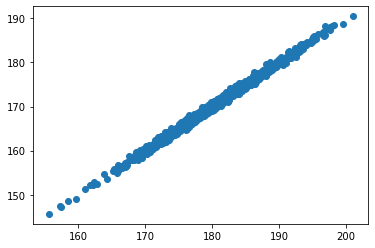

In [125]:
err = np.random.randn(m,1);
err = err*0.5 # 0.5 -> scaling factor for the noise, the smaller this factor the lesser the noise
y = x + err - 10
plt.scatter(x,y)

OK. It should have worked. The error added is not large, the symbols should lay almost on the diagonal, but not quite.

As we increase the `err` the symbols should move away from the diagonal.

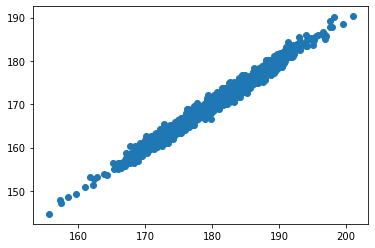

In [126]:
err = np.random.randn(m,1);
scaling_factor = 0.99
err = err*scaling_factor 
y = x + err - 10 
plt.scatter(x,y)

One way to think about the scaling factor and `err` is that they are related to correlation. Indeed, they are not directly related to correlation (not a one-to-one relationship, but a proxy). 

The scaling factor is inversely related to correlation because as the scaling factor increases the correlation decreases. Furthermore, they are not directly related to correlation because they both depend on a couple of variables, for example, the variance of the distributions (both `err` and `x` will affect the relationship between the correlation and the scaling factor).

$\color{blue}{\text{Complete the following exercise.}}$

  - Add a title and labels to the scatter plot above. Use the cell below to make the new plot with the new attributes.

Text(0.5, 0, 'President Height')

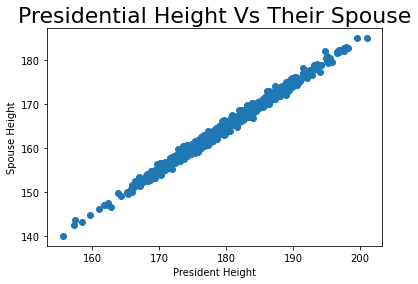

In [131]:
err = np.random.randn(m,1);
scaling_factor = 0.66
err = err*scaling_factor 
y = x + err - 15 
plt.scatter(x,y)
plt.title('Presidential Height Vs Their Spouse', fontsize = 22)
plt.ylabel('Spouse Height')
plt.xlabel('President Height')

Python has a method to generate couples of correlated arrays. We will now briefly explore it, but leave a deeper dive on each function to you. You are suggested to further explore the code below and its implications. It might come helpful to us later down the road, you never know!

### A more principled way to make correlated datasets

NumPy has a function called `multivariate_normal` that generates pairs of correlated datasets. The correlation values can be specified conveniently. A little bit of thinking is required, though. The function uses the covariance matrix. The covariance matrix is composed of 4 numbers. Two of the numbers describe the variances of the two datasamples we want to generate. The other two values describe the correlation between the samples and are generally called `covariances` (co-variations or co-relations).

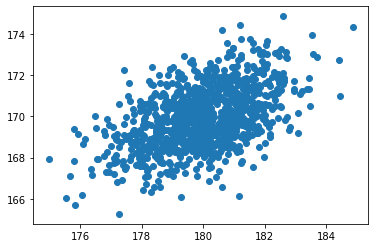

In [7]:
from  numpy.random import multivariate_normal # we import the function
x_mu = 180; # we set up the mean of the first set of data points 
y_mu = 170; # we set up the mean of the second sample
x_var = 2; # the variance of the first sample
y_var = 2; # the variance of the second sample
cov = 0.9; # this is the covariance (can be thought of as correlation)

# the function multivariate_normal will need a matrix to control
# the relation between the samples, this matrix is called covariance matrix
cov_m = [[x_var, cov],
         [cov, y_var]]

# we now create the two data sets by setting the the proper
# means and passing the covariance matrix, we also pass the
# requested size of the sample
data = multivariate_normal([x_mu, y_mu], cov_m, size=1000)

# We can plot the two data sets
x, y = data[:,0], data[:,1]
plt.scatter(x, y)

$\color{blue}{\text{Complete the following exercise.}}$

  - Simulate two datasets of the walking stride of mothers and 10-years old daugthers. 
  - We will make a few assumptions. We will assume that:
    - the walking stride of the mothers is on average 80 cm with a standard deviation of 2 cm. 
    - that the daugthers' height at 10 years of age is correlated to the mother's height and it is about 70% of that of the mothers (70% of 80) and with a standard deviation also proportional to that of the mothers (70%)
    
Reuse the code above but isntert the new parameters suggested here to make a simulation of 1000 mothers and daugthers. Make a correlation plot and add titles and labels to the axis:

Text(0.5, 0, 'Mother Strides in CM')

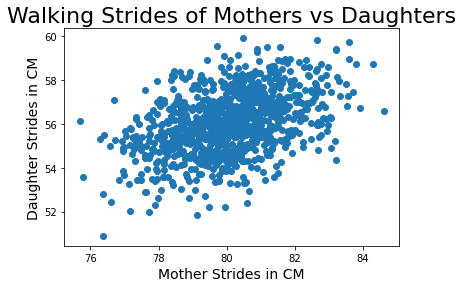

In [134]:
from  numpy.random import multivariate_normal # we import the function
x_mu_mom = 80; # we set up the mean of the first set of data points 
y_mu_daughter = 56; # we set up the mean of the second sample
x_var_mom = 2; # the variance of the first sample
y_var_daughter = 1.4; # the variance of the second sample
covarience = 0.7; # this is the covariance (can be thought of as correlation)

# the function multivariate_normal will need a matrix to control
# the relation between the samples, this matrix is called covariance matrix
cov_m = [[x_var, cov],
         [cov, y_var]]

# we now create the two data sets by setting the the proper
# means and passing the covariance matrix, we also pass the
# requested size of the sample
data = multivariate_normal([x_mu_mom, y_mu_daughter], cov_m, size=1000)

# We can plot the two data sets
x, y = data[:,0], data[:,1]
plt.scatter(x, y)
plt.title('Walking Strides of Mothers vs Daughters', fontsize =22 )
plt.ylabel('Daughter Strides in CM', fontsize = 14)
plt.xlabel('Mother Strides in CM', fontsize = 14)

### Creating multiple correlated datasets

Imagine now if we were asked to create a series of correlated datasets. Not one, nottwo, more than that.

Once the basic code used to build one is known. The rest of the datasets can be generated reusing the same code and putting the code inside a loop. Below we will show how to create 5 datasets using a `while` loop.

Plotting dataset:  1


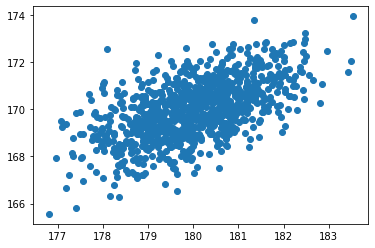

Plotting dataset:  2


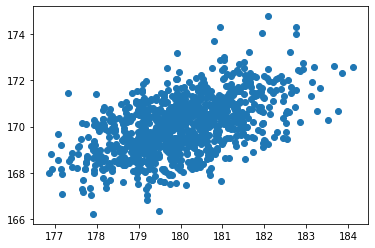

Plotting dataset:  3


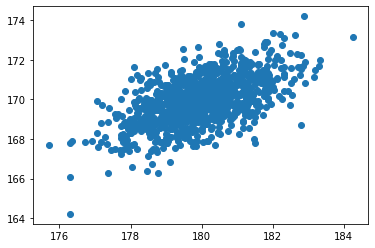

Plotting dataset:  4


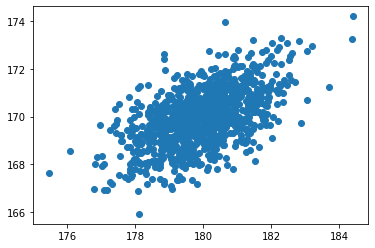

Plotting dataset:  5


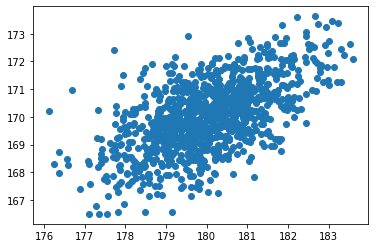

DONE Plotting datasets!


In [8]:
counter = 0;
n_datasets = 5;
siz_datasets = 1000;

x_mu = 180;  # mean height of the USA presidents 
y_mu = 170;  # mean height of the first ladies
x_var = 1.5; # the variance of the first dataset
y_var = 1.5; # the variance of the second dataset
cov = 0.85; # this is the covariance (can be thought of as correlation)

# covariance matrix
cov_m = [[x_var, cov],
         [cov, y_var]]

while counter < n_datasets :
    data = multivariate_normal([x_mu, y_mu], 
                               cov_m, 
                               size=siz_datasets)
    x, y = data[:,0], data[:,1]
    counter = counter + 1

    # Make a plot, show it, wait some time
    print("Plotting dataset: ", counter)
    plt.scatter(x, y);
    plt.show() ;
    plt.pause(0.05)

else:
    print("DONE Plotting datasets!")

$\color{blue}{\text{Complete the following exercise.}}$

  - Use subplot to organize the plots made using the code about. in other words, repeate the plotting made above but organzie the plots using subplot.

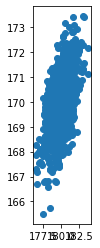

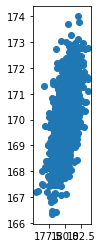

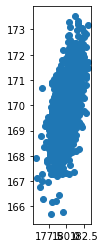

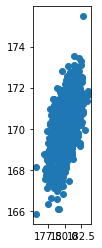

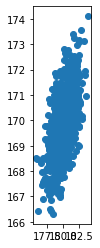

DONE Plotting datasets!


In [12]:
counter = 0;
sub = 151
n_datasets = 5;
siz_datasets = 1000;

x_mu = 180;  # mean height of the USA presidents 
y_mu = 170;  # mean height of the first ladies
x_var = 1.5; # the variance of the first dataset
y_var = 1.5; # the variance of the second dataset
cov = 0.85; # this is the covariance (can be thought of as correlation)

# covariance matrix
cov_m = [[x_var, cov],
         [cov, y_var]]

while counter < n_datasets :
    data = multivariate_normal([x_mu, y_mu], 
                               cov_m, 
                               size=siz_datasets)
    x, y = data[:,0], data[:,1]
    plt.subplot(sub)
    counter = counter + 1
    sub = sub + 1

    # Make a plot, show it, wait some time
   
    plt.scatter(x, y);
    plt.show() ;
    plt.pause(0.05)

else:
    print("DONE Plotting datasets!")